<a href="https://colab.research.google.com/github/Isamar6v/DeepLearning/blob/main/Clasificaci%C3%B3n_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificación de imágenes de Cifar-10
En este ejercicio construiremos un clasificador de imágenes con redes convolucionales. Entrenaremos nuestro modelo con la base de datos CIFAR-10 que contiene 60,000 imágenes a color de 32x32 pixeles.
Las clases son las siguientes:
- 0 -> aviones
- 1 -> automóviles
- 2 -> aves
- 3 -> gatos
- 4 -> venados
- 5 -> perros
- 6 -> ranas
- 7 -> caballos
- 8 -> barcos
- 9 -> tractocamiones

In [3]:
from numpy.random import seed
seed(1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Librerías de keras para Deep Learning
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers, backend
import tensorflow.keras.utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
# Obtención de las imágenes y sus etiquetas
# La función load_data() da como respuesta los grupos de entrenamiento y test por separado
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [7]:
print('El numero de imágenes en el conjunto x_train es:', x_train.shape[0])
print('El numero de etiquetas en el conjunto y_train es:', y_train.shape[0])
print('El numero de imágenes en el conjunto x_test es:', x_test.shape[0])
print('El numero de etiquetas en el conjunto y_test es:', y_test.shape[0])

El numero de imágenes en el conjunto x_train es: 50000
El numero de etiquetas en el conjunto y_train es: 50000
El numero de imágenes en el conjunto x_test es: 10000
El numero de etiquetas en el conjunto y_test es: 10000


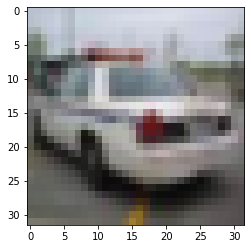

La imagen de entrenamiento 24678, corresponde con la etiqueta: [1]


In [8]:
# Inspección visual de los datos
# Graficaremos algunas imágenes del dataset.
n_imagen = 24678
etiqueta = y_train[n_imagen]
plt.imshow(x_train[n_imagen], cmap='gray')
plt.show()
print('La imagen de entrenamiento {}, corresponde con la etiqueta: {}'.format(n_imagen, etiqueta))

## Preprocesamiento de los datos
Cuando se entrenan redes neuronales convolucionales no es necesario aplanar las imágenes en un vector, se usan con su formato matricial y numero de canales 3 (RGB).  
Sin embargo, es recomendable escalar los valores de los pixeles de 0-255 a 0-1.
También es necesario convertir a codificación 1-hot las etiquetas. Con 1-hot pasamos de tener una etiqueta que representa la clase 4 a un vector de 10 elementos donde el 4° elemento sea un 1 (comenzando desde la posición 0)
etiqueta 4 -> 0000100000

In [9]:
# EJERCICIO
# Escala los valores de los pixeles
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# Codificación 1-hot de las etiquetas //tomar un valor escalar y convertirlo a un vector
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
print(y_train[100], ' -> ', y_train1[100])

[8]  ->  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Creación del modelo 

In [5]:
# Con esta línea se elimina información previa de los modelos 
backend.clear_session()

In [11]:
# EJERCICIO
# Definición de la arquitectura
modeloConv = Sequential()
modeloConv.add(Conv2D(16, kernel_size=(2,2), activation='relu', input_shape=(32,32,3))) #(perceptrones...32x32 y 3 canales)
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Flatten())##un vector
modeloConv.add(Dense(200, activation='relu'))##200 neuronas en una capa
modeloConv.add(Dense(10, activation='softmax'))

In [12]:
modeloConv.summary() ##va a entrenar 127,954 pesos sinapticos

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

## Entrenamiento del modelo

In [13]:
# Define del optimizador Adam //Definir algoritmo que vas a entrenar (gradiente descendiente)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

# Compila el modelo
modeloConv.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy']) ##loss es funcion que va a minimizar relacionada al error y clasificacion es accuracy

In [14]:
# Entrenamos el modelo
M = modeloConv.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs = 10,
                   batch_size = 32, shuffle = True, verbose = 1) ##loss es error del modelo en ese instante y acccuracy primeras dos c/entrenamiento y otras 2 con test o validacion de 10 imagenes 7 las clasifica correctamente

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5082 - accuracy: 0.4557 - val_loss: 1.2547 - val_accuracy: 0.5558
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1795 - accuracy: 0.5812 - val_loss: 1.1459 - val_accuracy: 0.6046
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0473 - accuracy: 0.6329 - val_loss: 1.0498 - val_accuracy: 0.6378
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9533 - accuracy: 0.6658 - val_loss: 0.9529 - val_accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8761 - accuracy: 0.6932 - val_loss: 0.9411 - val_accuracy: 0.6700
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8094 - accuracy: 0.7166 - val_loss: 0.9123 - val_accuracy: 0.6851
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7524 - accuracy: 0.7381 - val_loss: 0.8640 - val_accuracy:

## Evaluación del modelo

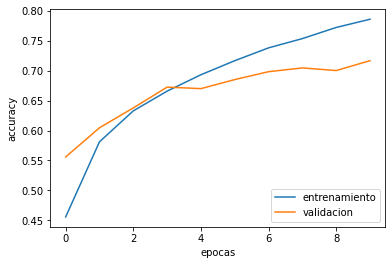

In [15]:
# Gráfica del accuracy (exactitud) durante el entrenamiento
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validacion')
plt.legend(loc='lower right')
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


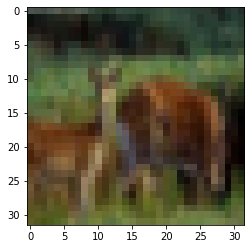

La imagen 4047, tiene la etiqueta [4], el modelo lo clasifica como: [4]


In [16]:
# EJERCICIO
# Prueba del modelo
n_imagen = 4047
imagen = x_test[n_imagen]
etiqueta = y_test[n_imagen]
prediccion = modeloConv.predict_classes(imagen.reshape(1,32,32,3))

# Gráfica de la imagen
plt.imshow(imagen)
plt.show()
print('La imagen {}, tiene la etiqueta {}, el modelo lo clasifica como: {}'.format(n_imagen, etiqueta, prediccion))

In [17]:
# Evaluación del modelo
evaluacion = modeloConv.evaluate(x_test, y_test1)
error = evaluacion[0]
accuracy = evaluacion[1]
print('Error final del modelo: ', error)
print('Accuracy (precisión) del modelo: ', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.8446 - accuracy: 0.7167
Error final del modelo:  0.8446010947227478
Accuracy (precisión) del modelo:  0.71670001745224
